In [3]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


director null rate: 31.58%
cast null rate: 9.14%
country null rate: 7.64%
date_added null rate: 0.18%
rating null rate: 0.16%


,Number
"Dramas, Independent Movies, Thrillers",17
Horror Movies,39
"Kids' TV, TV Comedies",73
"Kids' TV, TV Dramas",2
"Comedies, Cult Movies",10
...,...
"Comedies, Documentaries",2
"Action & Adventure, Comedies, Sci-Fi & Fantasy",7
"International TV Shows, Korean TV Shows, TV Action & Adventure",6
"Action & Adventure, Anime Features, Horror Movies",1


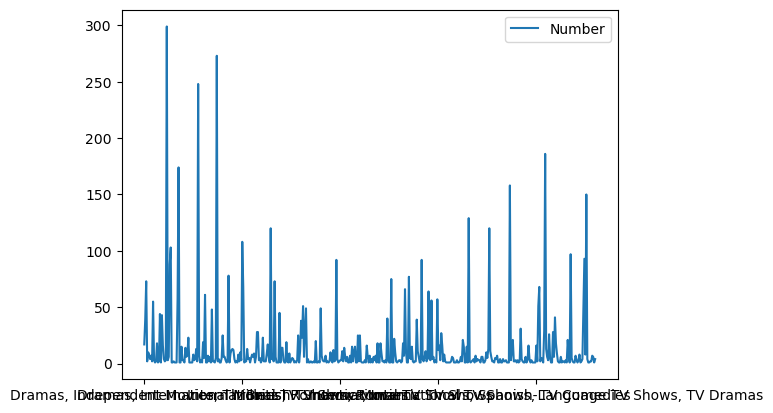

{'NC-17': 2, 'G': 37, 'TV-G': 149, 'TV-PG': 699, 'UR': 7, 'R': 508, 'PG-13': 286, 'TV-Y7': 168, 'TV-MA': 2025, 'TV-14': 1695, 'PG': 184, 'TV-Y7-FV': 95, 'TV-Y': 142, 'NR': 217}


,Number
NC-17,2
G,37
TV-G,149
TV-PG,699
UR,7
R,508
PG-13,286
TV-Y7,168
TV-MA,2025
TV-14,1695


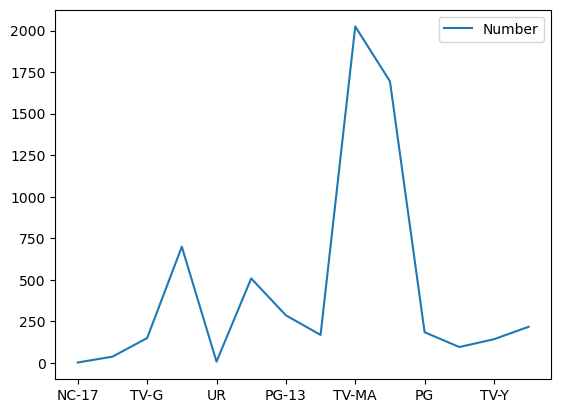

In [33]:
try:
    netflix_dataframe = pd.read_csv("./Netflix_shows_movies.csv")
    display(netflix_dataframe.head(3))

    # Address missing data

    # The code below shows the null rate of each column
    for i in netflix_dataframe.columns:
        null_rate = netflix_dataframe[i].isna().sum() / len(netflix_dataframe) * 100

        if null_rate > 0:
            print("{} null rate: {}%".format(i, round(null_rate, 2)))


    # Fixing missing data

    netflix_dataframe['country'] = netflix_dataframe['country'].fillna(netflix_dataframe['country'].mode()[0])


    netflix_dataframe["cast"] = netflix_dataframe['cast'].replace(np.nan, 'No Data')
    netflix_dataframe['director'] = netflix_dataframe['director'].replace(np.nan, 'No Data')

    # Drops

    netflix_dataframe.dropna(inplace=True)

    # Drop Duplicates

    netflix_dataframe.drop_duplicates(inplace= True)

    

    # netflix_dataframe["date_added"] = pd.to_datetime(netflix_dataframe["date_added"])
    # display(netflix_dataframe.head(30))


    # Data exploration
    # Describing the data
    genre_dataframe = netflix_dataframe["listed_in"]
    genre_list = []
    for i in genre_dataframe:
        genre_list.append(i)

    genre_set = set(genre_list)
    genre_dict = {}
    for i in genre_set:
        genre_dict[i] = genre_list.count(i)

    # print(genre_dict)

    #Create a data frame using the genre 
    num_list = []
    for i in range(len(list(genre_set))):
        num_list.append(i)
        
    genre_df = pd.DataFrame(genre_dict.values(), index=list(genre_set), columns=["Number"])
    display(genre_df)
    # Generate the graph for the genres
    genre_df.plot()

    plt.show()

    
    # Todo: Better visualization with seaborn to rep the genres and the ratings

    # Visualizing ratings
    rating_dataframe = netflix_dataframe["rating"]
    rating_list = []
    for i in rating_dataframe:
        rating_list.append(i)

    rating_set = set(rating_list)
    rating_dict = {}
    for i in rating_set:
        rating_dict[i] = rating_list.count(i)

    print(rating_dict)
    rating_df = pd.DataFrame(rating_dict.values(), index=list(rating_set), columns=["Number"])
    display(rating_df)
    # Generate the graph for the ratings
    rating_df.plot()

    plt.show()


    
except FileNotFoundError:
    print("Please make sure that the file named Netflix_shows_movies.csv exists in the root folder")